#Terceira lista de Aprendizado de máquina

In [0]:
from google.colab import files
files.upload()

Saving ds_q1.csv to ds_q1.csv
Saving ds_q2.csv to ds_q2.csv
Saving ds_q3.csv to ds_q3.csv


{'ds_q1.csv': b'Amostra;X1;X2;X3;X4\n1;79.9;13.9;6.2;3.3\n2;78.5;16.3;7.2;2.5\n3;68.9;22.6;8.5;3.6\n4;62.2;20.2;17.6;2.8\n5;69.2;23.7;7.1;0.9\n6;67.8;19.8;12.4;3.8\n7;61.3;24.9;13.8;2.2\n9;71.6;19.2;9.2;3.6\n10;83.7;10.5;5.8;4.4\n11;67.1;26.5;6.4;1.4\n12;59.8;27.9;12.3;3.5\n13;66.7;23.2;10.1;2.9\n14;72.8;14.5;12.7;1.9\n15;60.9;28.9;10.2;1.5\n16;61.4;29.2;9.4;2.5\n17;75;16.8;8.2;3.1\n18;80.5;11.9;7.6;3.8\n19;71.3;18.5;10.2;2.6\n20;56.6;28.9;14.5;2.8\n21;55.9;32.8;11.3;3.1\n22;61.5;28.1;10.4;2.7\n23;59.2;28.4;12.4;2.8\n24;76.9;16.3;6.8;2.9\n25;58;27.6;14.4;3.4\n',
 'ds_q2.csv': b'Amostra;X1;X2;X3\n1;-7.82;-4.58;-3.97\n2;-6.68;3.16;2.71\n3;4.36;-2.19;2.09\n4;6.72;0.88;2.80\n5;-8.64;3.06;3.50\n6;-6.87;0.57;-5.45\n7;4.47;-2.62;5.76\n8;6.73;-2.01;4.18\n9;-7.71;2.34;-6.33\n10;-6.91;-0.49;-5.68\n11;6.18;2.81;5.82\n12;6.72;-0.93;-4.04\n13;-6.25;-0.26;0.56\n14;-6.94;-1.22;1.13\n15;8.09;0.20;2.25\n16;6.81;0.17;-4.15\n17;-5.19;4.24;4.04\n18;-6.38;-1.74;1.43\n19;4.08;1.30;5.33\n20;6.27;0.93;-2.78\n

In [0]:
!ls

ds_q1.csv  ds_q2.csv  ds_q3.csv  sample_data


##Questão 1



In [0]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [0]:
dados_q1 = pd.read_csv("ds_q1.csv", index_col=0, sep=';', dtype='float')
dados_q1.head()

,X1,X2,X3,X4
Amostra,,,,
1.0,79.9,13.9,6.2,3.3
2.0,78.5,16.3,7.2,2.5
3.0,68.9,22.6,8.5,3.6
4.0,62.2,20.2,17.6,2.8
5.0,69.2,23.7,7.1,0.9


###(a)

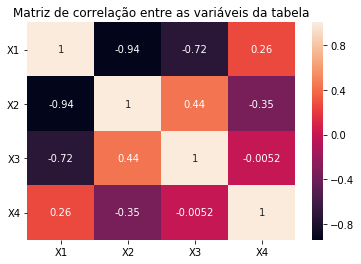

In [0]:
corr = dados_q1.corr()
sns.heatmap(corr, annot=True)

# Codigo para corrigir matrix truncada
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.yticks(rotation=0);
plt.title("Matriz de correlação entre as variáveis da tabela")
plt.show()

###(b)

In [0]:
autovalores, autovetores = np.linalg.eig(corr.to_numpy())
autovalores_pd = pd.Series(autovalores)
autovetores_pd = pd.DataFrame(autovetores)

#Ordena AutoValores e AutoVetores
autovalores_pd = autovalores_pd.sort_values(ascending=False)
autovetores_pd = autovetores_pd.reindex(autovalores_pd.index)

print("Autovalores ordenados: ")
print(autovalores_pd.to_string())
print()
print("Autovetores ordenados: ")
print(autovetores_pd.to_string())

Autovalores ordenados: 
0    2.507544
3    1.018395
2    0.472769
1    0.001292

Autovetores ordenados: 
          0         1         2         3
0  0.624028 -0.756651 -0.171097 -0.093772
3  0.243574 -0.006091  0.442228  0.863174
2 -0.465290 -0.288303 -0.685302  0.480362
1 -0.578590 -0.586790  0.552739 -0.124056


###(c)
$
Y_0 = 0.624X_1 - 0.757X_2 - 0.171097X_3 - 0.093772X_4\\
Y_3 = 0.243574X_1 - 0.006091X_2 + 0.442228X_3 + 0.863174X_4\\
Y_2 = - 0.465290X_1 - 0.288303X_2 - 0.685302X_3 + 0.480362X_4\\
Y_1 = - 0.578590X_1 - 0.586790X_2 + 0.552739X_3 - 0.124056X_4\\
$

###(d)

In [0]:
var = autovalores_pd/autovalores_pd.sum()
print("Porcentagens das componentes: ")
print(var.to_string())

print("\nPorcentagem cumulativa das componentes:")
print(var.cumsum().to_string())

Porcentagens das componentes: 
0    0.626886
3    0.254599
2    0.118192
1    0.000323

Porcentagem cumulativa das componentes:
0    0.626886
3    0.881485
2    0.999677
1    1.000000


##Questão 2

In [0]:
from sklearn.cluster import KMeans
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

In [0]:
dados_q2 = pd.read_csv("ds_q2.csv", index_col=0, sep=';', dtype='float')
dados_q2.head()

,X1,X2,X3
Amostra,,,
1.0,-7.82,-4.58,-3.97
2.0,-6.68,3.16,2.71
3.0,4.36,-2.19,2.09
4.0,6.72,0.88,2.80
5.0,-8.64,3.06,3.50


###(a)

In [0]:
km_random = KMeans(n_clusters=3, init='random')
km_random.fit(dados_q2)

iter_a = km_random.n_iter_
centers_a = km_random.cluster_centers_

print("KMeans com centros iniciados manualmente: ")
print(centers_a)
print(f"\nNúmero de iterações (tolerância de 1e-4): {iter_a} iterações")

KMeans com centros iniciados manualmente: 
[[-7.3275     -0.54       -5.3575    ]
 [ 6.043      -0.146       1.726     ]
 [-6.68        1.20666667  2.22833333]]

Número de iterações (tolerância de 1e-4): 2 iterações


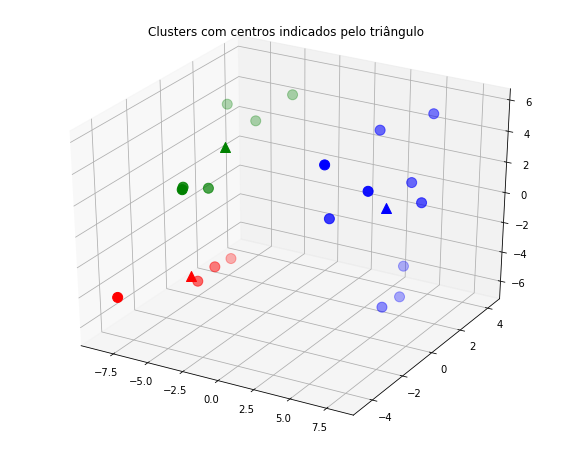

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

d_q2_a = dados_q2.copy(deep=True)
d_q2_a['class'] = km_random.predict(dados_q2)

for i in [[0, 'red'], [1, 'blue'], [2, 'green']]:
  ax.scatter(d_q2_a[d_q2_a['class']==i[0]]['X1'], 
             d_q2_a[d_q2_a['class']==i[0]]['X2'], 
             d_q2_a[d_q2_a['class']==i[0]]['X3'], 
             marker='o', s=100, color=i[1])
    
  ax.scatter(centers_a[i[0]][0], centers_a[i[0]][1], centers_a[i[0]][2], marker='^', s=100, color=i[1])

plt.title("Clusters com centros indicados pelo triângulo")
plt.show()

###(b)

In [0]:
clusters_iniciais = np.array([[0, 0, 0], [1, 1, 1], [-1, 0, 2]])
km_manual = KMeans(n_clusters=3, init=clusters_iniciais, n_init=1)
km_manual.fit(dados_q2)

iter_b = km_manual.n_iter_
centers_b = km_manual.cluster_centers_

print("KMeans com centros iniciados manualmente: ")
print(centers_b)
print(f"\nNúmero de iterações (tolerância de 1e-4): {iter_b} iterações")

KMeans com centros iniciados manualmente: 
[[-7.3275     -0.54       -5.3575    ]
 [ 6.043      -0.146       1.726     ]
 [-6.68        1.20666667  2.22833333]]

Número de iterações (tolerância de 1e-4): 2 iterações


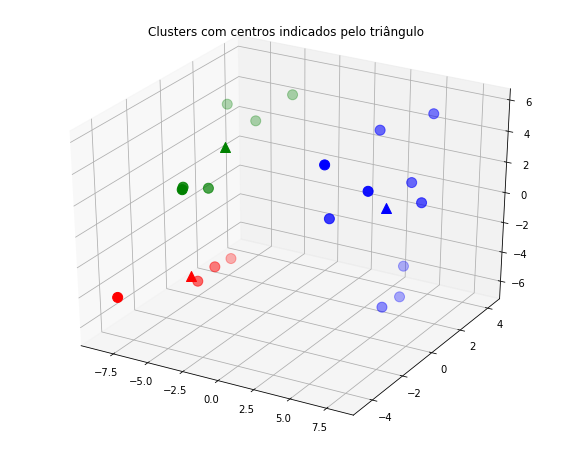

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

d_q2_b = dados_q2.copy(deep=True)
d_q2_b['class'] = km_manual.predict(dados_q2)

for i in [[0, 'red'], [1, 'blue'], [2, 'green']]:
  ax.scatter(d_q2_b[d_q2_b['class']==i[0]]['X1'], 
             d_q2_b[d_q2_b['class']==i[0]]['X2'], 
             d_q2_b[d_q2_b['class']==i[0]]['X3'], 
             marker='o', s=100, color=i[1])
    
  ax.scatter(centers_b[i[0]][0], centers_b[i[0]][1], centers_b[i[0]][2], marker='^', s=100, color=i[1])

plt.title("Clusters com centros indicados pelo triângulo")
plt.show()

###(c)

In [0]:
clusters_iniciais = np.array([[-0.1, 0, 0.1], [0, -0.1, 0.1], [-0.1, -0.1, 0.1]])
km_manual2 = KMeans(n_clusters=3, init=clusters_iniciais, n_init=1)
km_manual2.fit(dados_q2)

iter_c = km_manual2.n_iter_
centers_c = km_manual2.cluster_centers_

print("KMeans com centros iniciados manualmente: ")
print(centers_c)
print(f"\nNúmero de iterações (tolerância de 1e-4): {iter_c} iterações")

KMeans com centros iniciados manualmente: 
[[-6.83666667  3.48666667  3.41666667]
 [ 6.043      -0.146       1.726     ]
 [-6.98285714 -0.76857143 -2.61571429]]

Número de iterações (tolerância de 1e-4): 4 iterações


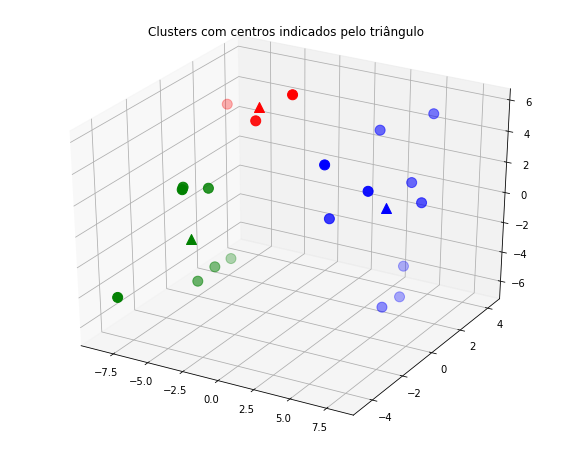

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

d_q2_c = dados_q2.copy(deep=True)
d_q2_c['class'] = km_manual2.predict(dados_q2)

for i in [[0, 'red'], [1, 'blue'], [2, 'green']]:
  ax.scatter(d_q2_c[d_q2_c['class']==i[0]]['X1'], 
             d_q2_c[d_q2_c['class']==i[0]]['X2'], 
             d_q2_c[d_q2_c['class']==i[0]]['X3'], 
             marker='o', s=100, color=i[1])
    
  ax.scatter(centers_c[i[0]][0], centers_c[i[0]][1], centers_c[i[0]][2], marker='^', s=100, color=i[1])

plt.title("Clusters com centros indicados pelo triângulo")
plt.show()

A diferença dos centros e do número de iterações ocorre, pois elas dependem do número da inicialização do centros. Como os centros da letra (c) estavam próximos entre si e mais longe dos centros teóricos, houve uma maior demora na convergência e uma diferênça nos valores dos centros.

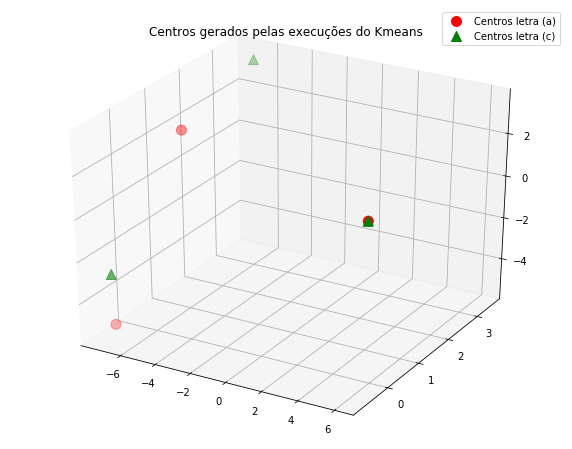

In [0]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')


ax.scatter(centers_a[:, 0], centers_a[:, 1], centers_a[:, 2], marker='o', s=100, color='red', label="Centros letra (a)")
ax.scatter(centers_c[:, 0], centers_c[:, 1], centers_c[:, 2], marker='^', s=100, color='green', label="Centros letra (c)")

plt.title("Centros gerados pelas execuções do Kmeans")
ax.legend()
plt.show()

##Questão 3

In [0]:
import pandas as pd
import numpy as np
from numpy.linalg import norm
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

In [0]:
dados_q3 = pd.read_csv("ds_q3.csv", index_col=0, sep=';')
dados_q3.head()

,Expectativa de Vida,Educação,PIB,Estabilidade Política
Países,,,,
Reino Unido,0.88,0.99,0.91,1.10
Austrália,0.90,0.99,0.93,1.26
Canadá,0.90,0.98,0.94,1.24
Estados Unidos,0.87,0.98,0.97,1.18
Japão,0.93,0.93,0.93,1.20


In [0]:
def centroide(congl):
  return np.sum(congl, axis=0)/congl.shape[0]

def distConglomerado(c0, c1):
  cent0 = centroide(c0)
  cent1 = centroide(c1)
  factor = c0.shape[0]*c1.shape[0]/(c0.shape[0]+c1.shape[0])
  return np.square(norm(cent0-cent1))*factor 

def criterioR2(data, ind):
  m = centroide(data)
  SSB = 0.0
  SST = 0.0
  for i in ind:
    cluster = data[i, :]
    ni = cluster.shape[0]
    mi = centroide(cluster)
    SSB += np.square(norm(mi-m))*ni
    for j in range(cluster.shape[0]):
      SST += np.square(norm(cluster[j, :] - mi))

  return (SSB/SST)

def concatCongl(C, i, j):
  C1 = C[i]
  C2 = C[j]
  if(i < j):
    del(C[j])
    del(C[i])
  else:
    del(C[i])
    del(C[j])

  C.append(C1 + C2)
  return C

In [0]:
ind = [[i,] for i in range(dados_q3.shape[0])]
R2 = []
sim = np.zeros((len(ind), len(ind)))
ind_hist = []
matriz = dados_q3.to_numpy()

while(len(ind) != 1):
  sim = np.zeros((len(ind), len(ind)))
  for i in range(len(ind)):
    for j in range(len(ind)):
      if(i == j):
        sim[i, j] = 100000
      else:
        dc = distConglomerado(matriz[ind[i], :], matriz[ind[j], :])
        sim[i, j] = dc
     
  #Obtem menor distância entre os aglomerados
  minimo = np.argmin(sim.flatten())
  i = int(minimo/sim.shape[1])
  j = minimo%sim.shape[1]

  ind = concatCongl(ind, i, j)

  # if(R2[0] < 0):
  #   del(R2[0])

  R2 += [criterioR2(matriz, ind), ]
  ind_hist.append(ind.copy())


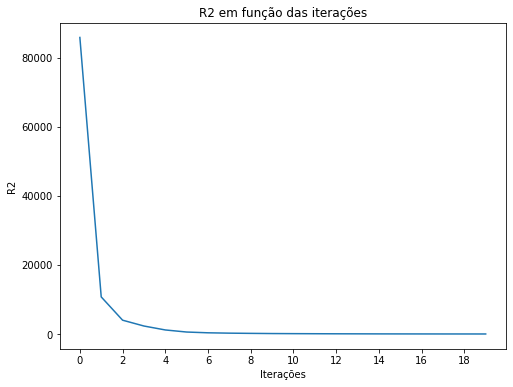

In [0]:
plt.figure(figsize=(8, 6))

plt.plot(np.arange(0, len(R2), 1), R2)
plt.ylabel('R2')
plt.xlabel('Iterações')
plt.xticks(np.arange(0, len(R2), 2))
plt.title("R2 em função das iterações")
plt.show()

In [0]:
ind_i = 0

for i in range(1, len(R2)):
  if(abs(R2[i]-R2[i-1]) < 10):
    ind_i = i
    break;

class_id = 0;
d_q3_l = pd.DataFrame()

for i in ind_hist[ind_i]:
  temp = dados_q3.iloc[i, :].copy()
  temp['class'] = class_id
  d_q3_l = d_q3_l.append(temp)
  class_id += 1

d_q3_l[["class"]]

,class
Países,
Uruguai,0
Reino Unido,0
França,0
Cingapura,0
Austrália,0
Canadá,0
Estados Unidos,0
Japão,0
Colômbia,1


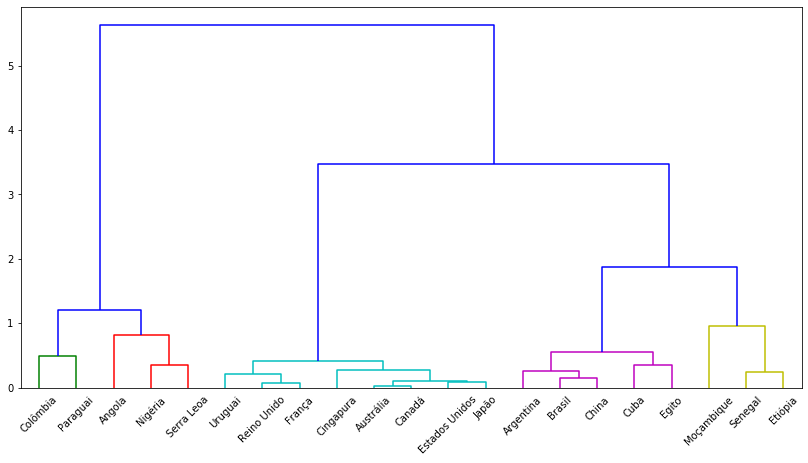

In [0]:
Z = linkage(matriz, 'ward')

plt.figure(figsize=(14, 7))
dendrogram(Z, color_threshold=1.2, labels=dados_q3.index)
plt.show()

In [0]:
print("Centroides:")
for cong in ind_hist[ind_i]:
  print(centroide(matriz[cong, :]))

Centroides:
[0.88375 0.95375 0.9075  1.185  ]
[ 0.76   0.84   0.66  -1.115]
[0.766 0.814 0.674 0.338]
[ 0.33666667  0.42333333  0.38333333 -1.53333333]
[ 0.34        0.36333333  0.37666667 -0.34333333]


##Questão 4

In [0]:
from sklearn.cluster import KMeans
import pandas as pd

In [0]:
km = KMeans(n_clusters=5, init='random', n_init=1)
km.fit(dados_q3)

print("KMeans com centros iniciados randomicamente: ")
print(km.cluster_centers_)
print(f"\nNúmero de iterações (tolerância de 1e-4): {km.n_iter_} iterações")

KMeans com centros iniciados randomicamente: 
[[ 0.605       0.715       0.53       -1.36      ]
 [ 0.67833333  0.74        0.62166667  0.315     ]
 [ 0.285       0.345       0.39       -1.62      ]
 [ 0.51        0.51666667  0.46666667 -0.7       ]
 [ 0.88375     0.95375     0.9075      1.185     ]]

Número de iterações (tolerância de 1e-4): 2 iterações


In [0]:
d_q4_l = dados_q3.copy()
d_q4_l['class'] = km.predict(dados_q3)

d_q4_l.sort_values("class")[["class"]]

,class
Países,
Colômbia,0
Nigéria,0
Egito,1
Brasil,1
Moçambique,1
Cuba,1
Argentina,1
China,1
Serra Leoa,2


##Questão 5


In [0]:
!pip install minisom
import numpy as np
from minisom import MiniSom
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

In [0]:
clen = 300

G1 = np.random.normal(loc=(0, 0, 0, 0, 0, 0, 0, 0), scale=1, size=(clen, 8))
G2 = np.random.normal(loc=(4, 0, 0, 0, 0, 0, 0, 0), scale=1, size=(clen, 8))
G3 = np.random.normal(loc=(0, 0, 0, 4, 0, 0, 0, 0), scale=1, size=(clen, 8))
G4 = np.random.normal(loc=(0, 0, 0, 0, 0, 0, 0, 4), scale=1, size=(clen, 8))

G = np.concatenate((G1, G2, G3, G4), axis=0)


In [0]:
ms = MiniSom(10, 10, 8, learning_rate=0.5)
ms.random_weights_init(G)
ms.train_random(G, 10000)

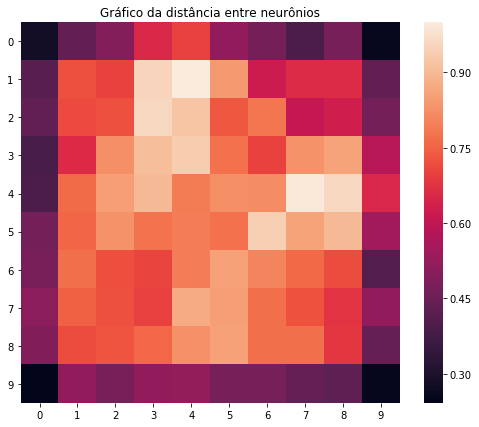

In [0]:
plt.figure(figsize=(8.5, 7))
sns.heatmap(ms.distance_map().T)

# Codigo para corrigir matrix truncada
b, t = plt.ylim()
b += 0.5
t -= 0.5 
plt.ylim(b, t)
plt.yticks(rotation=0);

plt.title("Gráfico da distância entre neurônios")
plt.show()

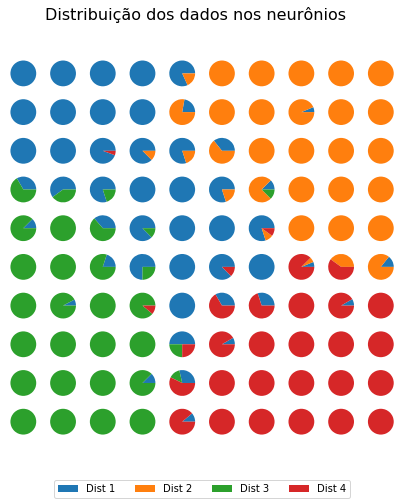

In [0]:
label = np.array(["Dist 1" for i in range(clen)]+
                 ["Dist 2" for i in range(clen)]+
                 ["Dist 3" for i in range(clen)]+
                 ["Dist 4" for i in range(clen)])
labels_map = ms.labels_map(G, label)
label_names = np.unique(label)

plt.figure(figsize=(7, 7))
the_grid = GridSpec(10, 10)
for position in labels_map.keys():
    label_fracs = [labels_map[position][l] for l in label_names]
    plt.subplot(the_grid[9-position[1], position[0]], aspect=1)
    patches, texts = plt.pie(label_fracs)

plt.suptitle("Distribuição dos dados nos neurônios", size=16)
plt.figlegend(patches, label_names, ncol=4, loc="lower center")
plt.show()